<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Data-Science-Fase-3-BEDU-Santander/blob/Update_2/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Fase 3
## Módulo 4: Análisis de Datos con Python
## Team
- [Omar Garduza](https://github.com/OmarGard)
- [Lizzeth Gómez Rodríguez](https://github.com/LIZZETHGOMEZ)
- [Edgar Casanova](https://github.com/ecardoz)
- [Alan Sandoval](https://github.com/SanLnAlan)


# Impacto de Cambio Climático en la Salud Pública

## Descripción de los datos
1. **country**: Países miembros de la OCDE
2. **year**: Año (1990-2018)
3. **respiratory_infections_and_tuberculosis_number**: Número de muertes por infecciones respiratorias y tuberculosis
4. **respiratory_infections_and_tuberculosis_percent**: Porcentaje de muertes por infecciones respiratorias y tuberculosis
5. **respiratory_infections_and_tuberculosis_rate**: Tasa de muertes por infecciones respiratorias y tuberculosis
6. **chronic_respiratory_diseases_number**: Número de muertes por enfermedades respiratorias crónicas
7. **chronic_respiratory_diseases_percent**: Porcentaje de muertes por enfermedades respiratorias crónicas
8. **chronic_respiratory_diseases_rate**: Tasa de muertes por enfermedades respiratorias crónicas
9. **all_greenhouse_gas**: Total de gases de efecto invernadero
10.	**CO2**: Emisiones de dióxido de carbono
11. **CH4**: Emisiones de metano
12.	**N2O**: Emisiones de Nitrógeno
13.	**Fgas**: Emisiones de gases de Fluoruro
14.	**mean_annual_temp**: Temperatura promedio en grados Celsius
15. **total_respiratory_diseases** Total de muertes por enfermedades respiratorias
16.	**total_diseases_percent** Porcentaje total de muertes por enfermedades respiratorias

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Cargamos los datos a utilizar (previamente procesados)
df = pd.read_csv("https://raw.githubusercontent.com/LIZZETHGOMEZ/Data-Science-Fase-3-BEDU-Santander/main/Data/cleanData.csv", index_col = 0)
df.head()

,country,year,respiratory_infections_and_tuberculosis_number,respiratory_infections_and_tuberculosis_percent,respiratory_infections_and_tuberculosis_rate,chronic_respiratory_diseases_number,chronic_respiratory_diseases_percent,chronic_respiratory_diseases_rate,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp,total_respiratory_diseases,total_diseases_percent
0,Mexico,1990,39290,0.08916,45.96035,16909,0.03839,19.78044,417.45,290.01,88.10,37.47,1.87,20.958333,56199,0.12755
1,Canada,1990,6797,0.03571,24.93967,9319,0.04895,34.19049,626.36,483.99,87.75,42.92,11.70,-7.450000,16116,0.08466
2,Israel,1990,772,0.02651,15.56473,1327,0.04556,26.75464,43.95,33.78,8.35,1.62,0.21,19.816667,2099,0.07207
3,Japan,1990,68816,0.08483,54.67434,29862,0.03681,23.72535,1109.37,1016.89,37.86,28.33,26.30,11.658333,98678,0.12164
4,Mexico,1991,37046,0.08447,42.53984,17171,0.03917,19.71738,435.45,308.41,88.71,36.36,1.97,20.891667,54217,0.12364


## 1. Estimados de Locación y Variabilidad

Para una mejor descripción de los datos utilizaremos estadística descriptiva que nos permitirá conocer un panorama más detallado de los datos.

### Media

En principio nos gustaría conocer el valor típico de todas nuestras variables numéricas a lo largo del tiempo, es decir el promedio histórico de los países de la OCDE.

In [3]:
# Promedio histórico de las variables durante el periodo 1990-2018
# Seleccionamos las variables numericas
var_num = ['total_respiratory_diseases','respiratory_infections_and_tuberculosis_number','chronic_respiratory_diseases_number', 'all_greenhouse_gas','CO2','CH4','N2O','Fgas','mean_annual_temp']
round(df[var_num].mean(),2)

total_respiratory_diseases                        20294.36
respiratory_infections_and_tuberculosis_number     9693.11
chronic_respiratory_diseases_number               10601.25
all_greenhouse_gas                                  243.08
CO2                                                 190.63
CH4                                                  31.44
N2O                                                  16.07
Fgas                                                  4.93
mean_annual_temp                                      9.61
dtype: float64

Asmismo también nos gustaría conocer el valor típico de las muertes por enfermedades respiratorias pero del año inicial 1990 y del año final 2018 para saber cómo ha cambiado la cifra a lo largo del tiempo.

In [4]:
# Media del número de muertes totales por enfermedades respiratorias ( infeciones y tuberculosisi + crónicas)
mean_90 = df[df['year'] == 1990]['total_respiratory_diseases'].mean()
print(f'El promedio de las muertes por enfermedades respiratorias de los países de la OCDE en 1990 es de {mean_90:,.2f}')

mean_18 = df[df['year'] == 2018]['total_respiratory_diseases'].mean()
print(f'El promedio de las muertes por enfermedades respiratorias de los países de la OCDE en 2018 es de {mean_18:,.2f}')

mean_total = df['total_respiratory_diseases'].mean()
print(f'El promedio de las muertes por enfermedades respiratorias de los países de la OCDE durante el periodo 1990-2018 es de {mean_total:,.2f}')

El promedio de las muertes por enfermedades respiratorias de los países de la OCDE en 1990 es de 18,863.88
El promedio de las muertes por enfermedades respiratorias de los países de la OCDE en 2018 es de 24,183.38
El promedio de las muertes por enfermedades respiratorias de los países de la OCDE durante el periodo 1990-2018 es de 20,294.36


Notemos que de 1990 a 2018 las muertes por enfermedades respiratorias se han incrementado, veamos en que porcentaje a sido este incremento, para ello creamos una función que por practicidad podremos usar varias veces dentro de nuestro análisis.




In [5]:
# Porcentaje
def percentage(num_1,num_2):
  return num_2/num_1*100

incremento = percentage(mean_90, (mean_18-mean_90))

# Incremento de las muertes por enfermedades respiratorias
print(f'El promedio de las muertes por enfermedades respiratorias en los países de la OCDE se han incrementado en un {incremento:.2f}% durante el periodo de 1990 a 2018')


El promedio de las muertes por enfermedades respiratorias en los países de la OCDE se han incrementado en un 28.20% durante el periodo de 1990 a 2018


Observemos ahora los valores típicos para cada país en el periodo de estudio (1990-2018)


In [6]:
# Agrupamos por países
paises = df.groupby(['country'])

# Sumamos las muertes totales por enfermedades respiratorias de cada país durante el periodo 1990-2018
# y lo dividimos entre el total de años
mean_country = round(paises['total_respiratory_diseases'].mean(), 2)
mean_country

country
Australia          11232.07
Austria             4044.55
Belgium            12119.97
Canada             20468.45
Chile               9785.34
Denmark             6200.41
Estonia              632.00
Finland             3401.45
France             41030.79
Germany            57779.31
Greece              7618.93
Hungary             6537.93
Iceland              180.69
Ireland             4082.62
Israel              2698.38
Italy              36647.66
Japan             132896.72
Latvia              1100.07
Luxembourg           303.03
Mexico             50941.62
Netherlands        15179.48
New Zealand         2644.72
Norway              4604.00
Poland             21374.03
Portugal           11725.45
Slovakia            3136.55
Slovenia            1274.34
Spain              41097.76
Sweden              6923.31
Switzerland         4725.38
Turkey             42297.10
United Kingdom     84735.34
Name: total_respiratory_diseases, dtype: float64

Notemos que existen grandes diferencias entre los países respecto al promedio de todos en ese periodo que es de **20,294.36** ('mean_time') lo que quiere decir que los países presentan diferentes características y aplican diferentes políticas de salud y de combate al cambio climático, por lo que el impacto sobre la población de cada país es distinto.

Motivo por el cual es importante tener ambas perspectivas, una conjunta de todos los países para poder establecer una línea de referencia, otra que tome en cuenta los aspectos de cada país.

### Mediana



In [7]:
# Mediana histórica de las variables durante el periodo 1990-2018
round(df[var_num].median(),2)

total_respiratory_diseases                        7080.50
respiratory_infections_and_tuberculosis_number    2995.50
chronic_respiratory_diseases_number               4360.00
all_greenhouse_gas                                  74.77
CO2                                                 59.14
CH4                                                 11.75
N2O                                                  6.57
Fgas                                                 1.53
mean_annual_temp                                     9.65
dtype: float64

De igual forma observemos la mediana para el año inicial y final

In [8]:
# Mediana
med_90 = df[df['year'] == 1990]['total_respiratory_diseases'].median()
print(f'La mediana de las muertes por enfermedades respiratorias de los países de la OCDE en 1990 es de {med_90:,.2f}')

med_18 = df[df['year'] == 2018]['total_respiratory_diseases'].median()
print(f'La mediana de las muertes por enfermedades respiratorias de los países de la OCDE en 2018 es de {med_18:,.2f}')

med_total = df['total_respiratory_diseases'].median()
print(f'La mediana de las muertes por enfermedades respiratorias de los países de la OCDE durante el periodo 1990-2018 es de {med_total:,.2f}')

La mediana de las muertes por enfermedades respiratorias de los países de la OCDE en 1990 es de 7,142.50
La mediana de las muertes por enfermedades respiratorias de los países de la OCDE en 2018 es de 9,291.50
La mediana de las muertes por enfermedades respiratorias de los países de la OCDE durante el periodo 1990-2018 es de 7,080.50


Observemos que la mediana está muy por debajo de los valores promedios antes encontrados, por lo que los datos podrían estar sesgados a la derecha, o quizá haya presencia de outliers.

Observemos ahora los valores por países y comparemos a estos con la media histórica de **7,080.50** 

In [9]:
# Mediana por países
mediana_country = paises['total_respiratory_diseases'].median()
mediana_country

country
Australia          10801
Austria             4045
Belgium            12368
Canada             19970
Chile               9932
Denmark             6227
Estonia              628
Finland             3214
France             41708
Germany            57109
Greece              7040
Hungary             6536
Iceland              180
Ireland             4091
Israel              2550
Italy              35621
Japan             127779
Latvia              1105
Luxembourg           301
Mexico             50934
Netherlands        15496
New Zealand         2579
Norway              4596
Poland             21106
Portugal           11339
Slovakia            3003
Slovenia            1250
Spain              42250
Sweden              6939
Switzerland         4772
Turkey             41967
United Kingdom     84571
Name: total_respiratory_diseases, dtype: int64

Observemos que también la mediana de cada país presenta una diferencia bastante grande respecto a la mediana histórica.

Para entender mejor que podría estar pasando y encontrar una estadística más robusta de los datos, utilizaremos la media truncada, que nos permite recortar un porcentaje de los valores extremos de nuestra muestra, por lo que en caso de haber outliers estos pueden ser removidos del estadístico y eliminar el sesgo.

### Media Truncada

In [10]:
#Sacamos promedio de las variables durante el periodo 1990-2018
media_truncada = stats.trim_mean(df[var_num], 0.25)

pd.DataFrame({'variable': var_num, 'media_truncada': media_truncada})

,variable,media_truncada
0,total_respiratory_diseases,9405.002155
1,respiratory_infections_and_tuberculosis_number,3959.461207
2,chronic_respiratory_diseases_number,5467.137931
3,all_greenhouse_gas,125.729073
4,CO2,95.116358
5,CH4,17.206078
6,N2O,9.653858
7,Fgas,2.262565
8,mean_annual_temp,9.627191


In [11]:
# Ahora observemos la media truncada pero oara el año inicial y el año final
med_trun_90 = stats.trim_mean(df[df['year'] == 1990]['total_respiratory_diseases'], 0.05)
print(f'La media truncada de las muertes por enfermedades respiratorias de los países de la OCDE en 1990 es de {med_trun_90:,.2f}')

med_trun_18 = stats.trim_mean(df[df['year'] == 2018]['total_respiratory_diseases'],0.05)
print(f'La media truncada de las muertes por enfermedades respiratorias de los países de la OCDE en 2018 es de {med_trun_18:,.2f}')

med_trun_total = stats.trim_mean(df['total_respiratory_diseases'], 0.05)
print(f'La media truncada de las muertes por enfermedades respiratorias de los países de la OCDE durante el periodo 1990-2018 es de {med_trun_total:,.2f}')


La media truncada de las muertes por enfermedades respiratorias de los países de la OCDE en 1990 es de 16,826.40
La media truncada de las muertes por enfermedades respiratorias de los países de la OCDE en 2018 es de 20,040.53
La media truncada de las muertes por enfermedades respiratorias de los países de la OCDE durante el periodo 1990-2018 es de 16,107.31


Para visualizar mejor nuestros datos creamos una tabla que contenga las medidas de tendencia central que ya hemos encontrado.

In [12]:
dic = {'periodo': [1990, 2018, 'total_historico'], 'media': [mean_90, mean_18, mean_total], 'mediana': [med_90, med_18, med_total],'media_truncada':[med_trun_90, med_trun_18, med_trun_total]}
medidas_centrales = pd.DataFrame(dic)
round(medidas_centrales,2)

,periodo,media,mediana,media_truncada
0,1990,18863.88,7142.5,16826.40
1,2018,24183.38,9291.5,20040.53
2,total_historico,20294.36,7080.5,16107.31


In [13]:
# Tablas de las medidas de tendencia central por país
dic_2 = {'media': mean_country, 'mediana': mediana_country}
medidas_centrales_paises = pd.DataFrame(dic_2)
medidas_centrales_paises.head()

,media,mediana
country,,
Australia,11232.07,10801
Austria,4044.55,4045
Belgium,12119.97,12368
Canada,20468.45,19970
Chile,9785.34,9932


Notemos que los estadísticos se encuentran lejos de coincidir, lo que podría deducirse que existen algunos años en los que el número de muertes por enfermedades respiratorias fueron realmente atípicos.

No obstante también debemos plantearnos el caso de cada país, es decir que habrá países con números muy bajos de fallecimientos por enfermedades respiratorias, mientras que habrá otros con altas defunciones por este motivo. lo que claramente estaría sesgando la estadística y por lo cual es necesario también análizar el caso para cada país.

### Desviación Estándar

In [14]:
# Deviación estándar de las variables númericas de interés
df[var_num].std()

total_respiratory_diseases                        28870.920713
respiratory_infections_and_tuberculosis_number    17750.419833
chronic_respiratory_diseases_number               12857.808723
all_greenhouse_gas                                  305.860433
CO2                                                 260.161024
CH4                                                  38.572636
N2O                                                  18.938883
Fgas                                                  7.236887
mean_annual_temp                                      5.671693
dtype: float64

In [15]:
# Desviación estándar de las muertes por enfermedades respiratorias por países
round(paises['total_respiratory_diseases'].std(),2)

country
Australia          1711.98
Austria             256.70
Belgium             857.67
Canada             2574.39
Chile               632.92
Denmark             442.83
Estonia              89.66
Finland             845.24
France             3063.71
Germany            5806.13
Greece             2340.38
Hungary             653.40
Iceland              10.26
Ireland             452.15
Israel              494.13
Italy              2822.53
Japan             21320.53
Latvia              201.42
Luxembourg           19.66
Mexico             5003.18
Netherlands        1568.90
New Zealand         202.72
Norway              119.68
Poland             1325.55
Portugal           2039.03
Slovakia            321.73
Slovenia            119.56
Spain              4919.31
Sweden              243.94
Switzerland         316.67
Turkey             6519.09
United Kingdom     5200.29
Name: total_respiratory_diseases, dtype: float64

### Rango

In [16]:
# Rango de las muertes por enfermedades respiratorias
df_1990 = df['year'] == 1990
df_2018 = df['year'] == 2018
range_1990 = df[df_1990]['total_respiratory_diseases'].max() - df[df_1990]['total_respiratory_diseases'].min()
range_2018 = df[df_2018]['total_respiratory_diseases'].max() - df[df_2018]['total_respiratory_diseases'].min()
range_total = df['total_respiratory_diseases'].max() - df['total_respiratory_diseases'].min()
print(f"El rango de muertes de los países de la OCDE en 1990 fue de: {range_1990:,}")
print(f"El rango de muertes de los países de la OCDE en 2018 fue de: {range_2018:,}")
print(f"El rango de muertes de los países de la OCDE desde 1990 a 2018 fue de: {range_total:,}")

El rango de muertes de los países de la OCDE en 1990 fue de: 98,504
El rango de muertes de los países de la OCDE en 2018 fue de: 172,232
El rango de muertes de los países de la OCDE desde 1990 a 2018 fue de: 172,275


### Percentiles

In [17]:
# Percentiles de las muertes por enfermedades respiratorias en 1990
print("Muertes por enfermedades respiratorias en 1990")
print(f"Valor mínimo: {df[df_1990]['total_respiratory_diseases'].min():,}")
print(f"Percentil 10: {df[df_1990]['total_respiratory_diseases'].quantile(0.1):,}")
print(f"Percentil 25: {df[df_1990]['total_respiratory_diseases'].quantile(0.25):,}")
print(f"Percentil 50: {df[df_1990]['total_respiratory_diseases'].median():,}")
print(f"Percentil 75: {df[df_1990]['total_respiratory_diseases'].quantile(0.75):,}")
print(f"Percentil 90: {df[df_1990]['total_respiratory_diseases'].quantile(0.9):,}")
print(f"Valor máximo: {df[df_1990]['total_respiratory_diseases'].max():,}")

Muertes por enfermedades respiratorias en 1990
Valor mínimo: 174
Percentil 10: 1,250.6
Percentil 25: 3,984.25
Percentil 50: 7,142.5
Percentil 75: 25,909.5
Percentil 90: 56,117.8
Valor máximo: 98,678


In [18]:
# Percentiles de las muertes por enfermedades respiratorias en 2018
print("Muertes por enfermedades respiratorias en 2018")
print(f"Valor mínimo: {df[df_2018]['total_respiratory_diseases'].min()}")
print(f"Percentil 10: {df[df_2018]['total_respiratory_diseases'].quantile(0.1):,.2f}")
print(f"Percentil 25: {df[df_2018]['total_respiratory_diseases'].quantile(0.25):,.2f}")
print(f"Percentil 50: {df[df_2018]['total_respiratory_diseases'].median():,.2f}")
print(f"Percentil 75: {df[df_2018]['total_respiratory_diseases'].quantile(0.75):,.2f}")
print(f"Percentil 90: {df[df_2018]['total_respiratory_diseases'].quantile(0.9):,.2f}")
print(f"Valor máximo: {df[df_2018]['total_respiratory_diseases'].max():,}")

Muertes por enfermedades respiratorias en 2018
Valor mínimo: 210
Percentil 10: 883.80
Percentil 25: 3,585.75
Percentil 50: 9,291.50
Percentil 75: 30,961.75
Percentil 90: 60,490.30
Valor máximo: 172,442


In [19]:
# Percentiles de las muertes durante el periodo de 1990 a 2018
print("Muertes por enfermedades respiratorias durante el periodo de 1990 a 2018")
print(f"Valor mínimo: {df['total_respiratory_diseases'].min()}")
print(f"Percentil 10: {df['total_respiratory_diseases'].quantile(0.1)}")
print(f"Percentil 25: {df['total_respiratory_diseases'].quantile(0.25):,}")
print(f"Percentil 50: {df['total_respiratory_diseases'].median():,}")
print(f"Percentil 75: {df['total_respiratory_diseases'].quantile(0.75):,}")
print(f"Percentil 90: {df['total_respiratory_diseases'].quantile(0.9):,.2f}")
print(f"Valor máximo: {df['total_respiratory_diseases'].max():,}")

Muertes por enfermedades respiratorias durante el periodo de 1990 a 2018
Valor mínimo: 167
Percentil 10: 902.5
Percentil 25: 3,208.75
Percentil 50: 7,080.5
Percentil 75: 28,337.25
Percentil 90: 52,273.10
Valor máximo: 172,442


### Rango intercuartilico

In [20]:
# Rango intercuartílico de las muertes en 1990
q3_1990 = df[df_1990]['total_respiratory_diseases'].quantile(0.75)
q1_1990 = df[df_1990]['total_respiratory_diseases'].quantile(0.25)
q3_2018 = df[df_2018]['total_respiratory_diseases'].quantile(0.75)
q1_2018 = df[df_2018]['total_respiratory_diseases'].quantile(0.25)
q3 = df['total_respiratory_diseases'].quantile(0.75)
q1 = df['total_respiratory_diseases'].quantile(0.25)

print(f"Rango intercuartilico de las muertes en 1990: {q3_1990 - q1_1990:,}")
print(f"Rango intercuartilico de las muertes en 2018: {q3_2018 - q1_2018:,}")
print(f"Rango intercuartilico de las muertes desde 1990 a 2018: {q3 - q1:,}")

Rango intercuartilico de las muertes en 1990: 21,925.25
Rango intercuartilico de las muertes en 2018: 27,376.0
Rango intercuartilico de las muertes desde 1990 a 2018: 25,128.5


Observemos que en 1990 el 50% de los datos de fallecimientos se encontraron por debajo de las 21,925 muertes, mientras quen en 2018 la cifra aumentó a 27,376 muertes por enfermedades respiratorias.
No obstante el 50% de los datos de todo el periodo se ubicaron por debajo de las 25,128 muertes.

In [21]:
# Tabla resumen de resultados
medidas_centrales['rango_intercuartilico'] = [q3_1990 - q1_1990, q3_2018 - q1_2018, q3 - q1]
medidas_centrales.head()

,periodo,media,mediana,media_truncada,rango_intercuartilico
0,1990,18863.875000,7142.5,16826.400000,21925.25
1,2018,24183.375000,9291.5,20040.533333,27376.00
2,total_historico,20294.358836,7080.5,16107.314593,25128.50


## 2. Visualización de los Datos
Para un mejor entendimiento de nuestros datos, este apartado muestra una visualización general de los mismosm, que nos permitiran a primerza vista darnos una idea de cómo se encuentran distribuidos, si presentan sesgo, o existe algún valor atípico.

Vamos a analizar las distribuciones de las 3 categorías que hemos analizado:
- Muertes en 1990
- Muertes en 2018
- Muertes desde 1990 a 2018

### Boxplots

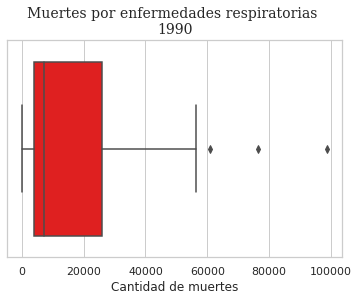

In [22]:
# 1990
sns.set(style="whitegrid")
ax = sns.boxplot(x=df[df_1990]['total_respiratory_diseases'], color = 'Red')
ax.set_title('Muertes por enfermedades respiratorias \n1990', family = 'serif', size = 14)
ax.set_xlabel('Cantidad de muertes');

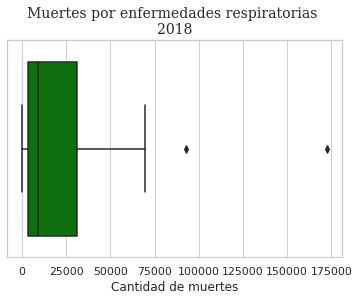

In [23]:
ax = sns.boxplot(x=df[df_2018]['total_respiratory_diseases'], color = 'green')
ax.set_title('Muertes por enfermedades respiratorias \n2018', family = 'serif', size = 14)
ax.set_xlabel('Cantidad de muertes');

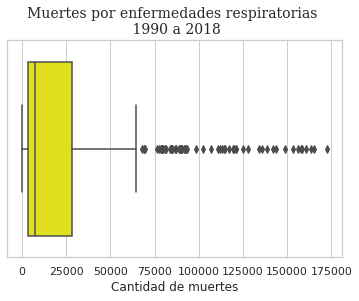

In [24]:
ax = sns.boxplot(x=df['total_respiratory_diseases'], color = 'yellow')
ax.set_title('Muertes por enfermedades respiratorias \n 1990 a 2018', family = 'serif', size = 14)
ax.set_xlabel('Cantidad de muertes');

Observemos que en los 3 casos hay prescencia de outliers y el 50% de nuestros datos están concentrados en un rango menor a las 50,000 muertes, por lo que podemos utilizar las medidas de tendencia central y distribución para ayudarnos a filtrar estos valores atípicos.

In [25]:
#Observemos las medidas de tendencia central de todo el periodo
round(df['total_respiratory_diseases'].describe(),2)

count       928.00
mean      20294.36
std       28870.92
min         167.00
25%        3208.75
50%        7080.50
75%       28337.25
max      172442.00
Name: total_respiratory_diseases, dtype: float64

### Rango intercuartílico y valores atípicos

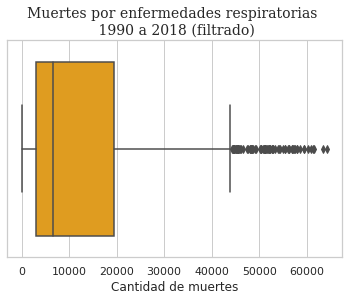

In [29]:
iqr = df['total_respiratory_diseases'].quantile(0.75) - df['total_respiratory_diseases'].quantile(0.25)
filtro_inferior = df['total_respiratory_diseases'] > df['total_respiratory_diseases'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['total_respiratory_diseases'] < df['total_respiratory_diseases'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df[filtro_inferior & filtro_superior]

ax = sns.boxplot(x=df_filtrado['total_respiratory_diseases'], color = 'orange')
ax.set_title('Muertes por enfermedades respiratorias \n 1990 a 2018 (filtrado)', family = 'serif', size = 14)
ax.set_xlabel('Cantidad de muertes');

In [30]:
# Medidas de tendencia central con datos filtrados
round(df_filtrado['total_respiratory_diseases'].describe(),2)

count      866.00
mean     14141.96
std      16267.58
min        167.00
25%       2981.50
50%       6605.50
75%      19391.00
max      64238.00
Name: total_respiratory_diseases, dtype: float64

### Tabla de frecuencias

Nos damos cuenta que eliminamos una gran cantidad de datos atípicos, esto se debe a que la población en los distintos países varía muchísmo, al igual que los sistemas de salud y los sistemas sanitarios. Dado esto, es de entenderse que existan países con un número de muertes muy alejado de los otros datos. También podemos comprobar esto con nuestroa valores de media y desviación que disminuyeron en casi la mitad

Ahora usaremos tablas de frecuencia para observar la distribución de las muertes

In [31]:
#Segmentamos nuestros datos en 20 intervalos
segmentos = pd.cut(df_filtrado['total_respiratory_diseases'], 20)

df_filtrado['total_respiratory_diseases'].groupby(segmentos).count()

total_respiratory_diseases
(102.929, 3370.55]     238
(3370.55, 6574.1]      190
(6574.1, 9777.65]       82
(9777.65, 12981.2]      86
(12981.2, 16184.75]     34
(16184.75, 19388.3]     19
(19388.3, 22591.85]     35
(22591.85, 25795.4]     11
(25795.4, 28998.95]      1
(28998.95, 32202.5]      0
(32202.5, 35406.05]     23
(35406.05, 38609.6]     25
(38609.6, 41813.15]     21
(41813.15, 45016.7]     31
(45016.7, 48220.25]     17
(48220.25, 51423.8]     16
(51423.8, 54627.35]     15
(54627.35, 57830.9]     11
(57830.9, 61034.45]      7
(61034.45, 64238.0]      4
Name: total_respiratory_diseases, dtype: int64

Graficamos un Histograma de los datos para percibir mejor como se encuentran distribuidos.

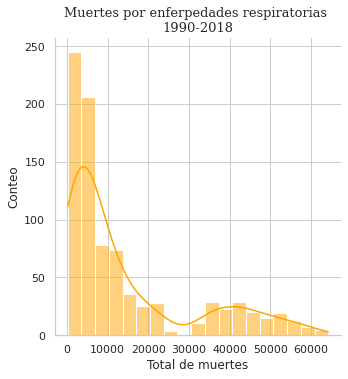

In [32]:
ax = sns.displot(data=df_filtrado, x="total_respiratory_diseases", kde=True, color = 'Orange')
ax.set_axis_labels("Total de muertes", "Conteo");
plt.title('Muertes por enferpedades respiratorias \n1990-2018', size = 13, family = 'serif');
ax = sns.set_theme(style = 'ticks')


Notemos que tenemos un comportamiento parecido a una distribución bimodal con asimetría positiva, esto no es del todo cierto, ya que nuestro segundo pico no es tan alto como el primero, pero podemos ver que en efecto podemos presentar una asimetría, esto lo confirmaremos con los valores de curtosis y asimetría

In [36]:
print(f'Curtosis: {round(kurtosis(df_filtrado["total_respiratory_diseases"]),2)}')
print(f'Asimetría: {round(skew(df_filtrado["total_respiratory_diseases"]),2)}')

Curtosis: 0.56
Asimetría: 1.36


Por último veremos una comparación de las muertes por países para ver cómo afectan la distribución

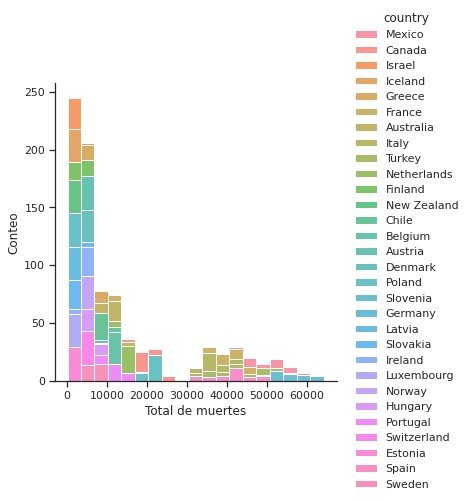

In [34]:
ax = sns.displot(data = df_filtrado, x ="total_respiratory_diseases", hue ="country", multiple="stack")
ax.set_axis_labels("Total de muertes", "Conteo");
sns.set_theme( style ='whitegrid')

Para fines de visualización, como graficar las densidades de todos los países va a resultar en una gráfica imposible de leer, graficaremos las densidades de los países en el continente americano que se encuentran en nuestro dataset, los cuáles con:
- México
- Canadá
- Chile

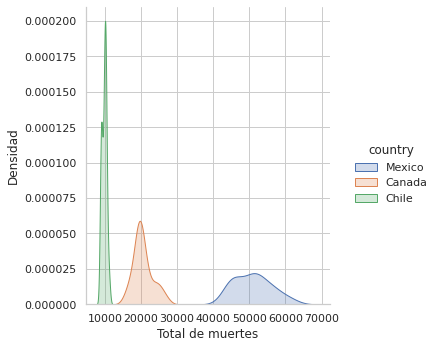

In [37]:
df_mexico = df_filtrado['country'] == "Mexico"
df_canada = df_filtrado['country'] == "Canada"
df_chile = df_filtrado['country'] == "Chile"

df_paises = df_filtrado [df_mexico | df_canada | df_chile]
ax = sns.displot(data=df_paises, x="total_respiratory_diseases", hue="country", kind="kde", fill = True,)
ax.set_axis_labels("Total de muertes", "Densidad");
sns.set_theme(style = 'ticks')

Podemos ver que tal vez México no sea uno de los países que tenga sus gráfica de densidad más elevada, a comparación de chile y canadá, pero sí vemos que está más a la derecha en total de muertes, esto significa que tiene más muertes en este rango de números que chile por ejemplo que sus muertes están por debajo de los 20,000

# 3. Exploración de variables categóricas y análisis multivariado

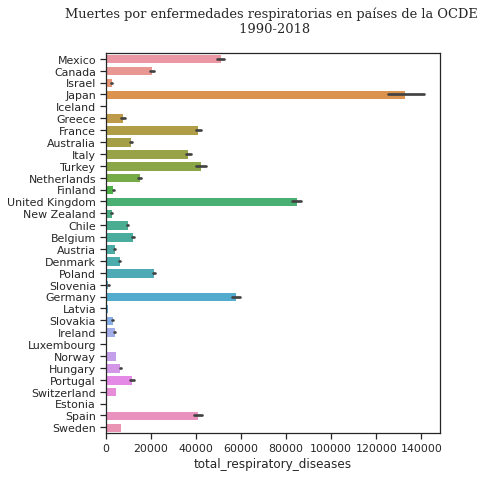

In [38]:
plt.figure(figsize = (6,7))
sns.barplot(x = df['total_respiratory_diseases'], y = df['country']);
plt.title('Muertes por enfermedades respiratorias en países de la OCDE \n 1990-2018\n', family = 'serif', size = 13);
plt.ylabel('');

Para un mejor entendimiento de nuestros datos creamos una variable binaria de los niveles de temperatura, sacaremos el promedio de la temperatura de los países en su conjunto para cada año, y asignaremos un 0 si la temperatura del país se ubicó por debajo del promedio y 1 si se colocó por encima. 

In [39]:
mean_temp = df[['year','mean_annual_temp']].groupby('year').mean()
df['mean_temp_category'] = 0

In [40]:
for i in range(0,len(df)):
  for year in range(1990,2018):
    if df['year'][i] == year and df['mean_annual_temp'][i] > mean_temp['mean_annual_temp'].loc[year]:
      df['mean_temp_category'][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


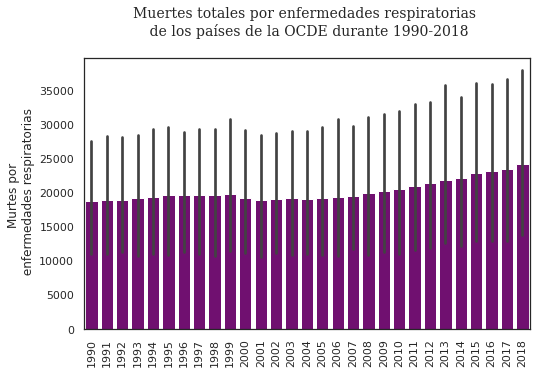

In [101]:
plt.figure(figsize = (8,5))
sns.set_theme(style = 'white');
sns.barplot(data = df, y = "total_respiratory_diseases", x = 'year', color = 'purple');
plt.xticks(rotation = 90);
plt.xlabel('')
plt.ylabel('Murtes por \n enfermedades respiratorias');
plt.title('Muertes totales por enfermedades respiratorias \n de los países de la OCDE durante 1990-2018\n', size = 14, family = 'serif');

Observemos nuevamente el promedio de muertes por enfermedades respiratorias en todo el periodo 1990-2018 y tomemos los 5 países con más muertes y los 5 países con menos, y hagamos lo mismo usando el nivel de gases de efecto invernadero y los niveles de temperatura.

In [91]:
# Países con mayor y menor número de muertes por enfermedades respiratorias durante 1990-2018
top_country_diseases = mean_country.sort_values(ascending = False)[:5]
tail_country_diseases = mean_country.sort_values(ascending = False)[-5:]

# Países con mayores y menores niveles de gases de efecto invernadero durante 1990-2018
top_country_gas = paises[['all_greenhouse_gas', 'CO2', 'CH4', 'N2O', 'Fgas']].mean().sort_values(by = 'all_greenhouse_gas', ascending = False)[0:5]
tail_country_gas = paises[['all_greenhouse_gas', 'CO2', 'CH4', 'N2O', 'Fgas']].mean().sort_values(by = 'all_greenhouse_gas',ascending = False)[-5:]

# Países con mayores y menores niveles de temperatura durante 1990-2018
top_country_temp = paises[['mean_annual_temp', 'mean_temp_category']].mean().sort_values(by = 'mean_annual_temp', ascending = False)[0:5]
tail_country_temp = paises[['mean_annual_temp', 'mean_temp_category']].mean().sort_values(by = 'mean_annual_temp',ascending = False)[-5:]


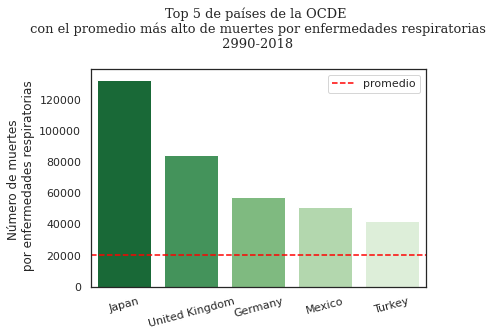

In [92]:
# Graficamos
sns.barplot(x = top_country_diseases.index, y = top_country_diseases, palette = 'Greens_r');
plt.axhline(y = mean_total, color = 'red', linestyle = '--', label = 'promedio');
plt.xticks(rotation = 15)
sns.set_theme(style = 'whitegrid')
plt.xlabel('')
plt.ylabel('Número de muertes \n por enfermedades respiratorias')
plt.title('Top 5 de países de la OCDE \n con el promedio más alto de muertes por enfermedades respiratorias \n 2990-2018 \n', size = 13, family = 'serif');
plt.legend();

Observemos los nieveles de gases de efecto invertadero y la particiación del CO2.

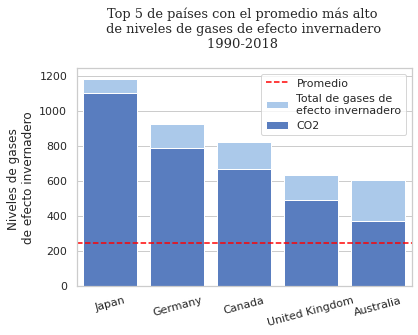

In [93]:
plt.subplots()
sns.set_color_codes('pastel');
sns.barplot( x = top_country_gas.index, y = top_country_gas['all_greenhouse_gas'], color = 'b', label = 'Total de gases de \nefecto invernadero');
plt.xticks(rotation = 15);
plt.axhline(y = df['all_greenhouse_gas'].mean(), color = 'red', ls = '--', label = 'Promedio')
plt.xlabel('');
plt.title('Top 5 de países con el promedio más alto \n de niveles de gases de efecto invernadero \n1990-2018 \n', size = 13, family = 'serif');

sns.set_color_codes('muted')
sns.barplot(data = top_country_gas, x = top_country_gas.index, y = 'CO2', color = 'b', label = 'CO2');
plt.xlabel('')
plt.ylabel('Niveles de gases \nde efecto invernadero');
plt.legend();

Claramente se observa que el CO2 es el gas con mayor prescencia en la última década. Además, observese que 3 de los 6 países coinciden en el top 5, es decir que podemos comenzar a suponer que si exuste una estrecha relación entre altos niveles de gases de efecto invernadero y las muertes por enfermedades respiratorias.

Hagamos lo mismo pero ahora utilizando los niveles de temperatura



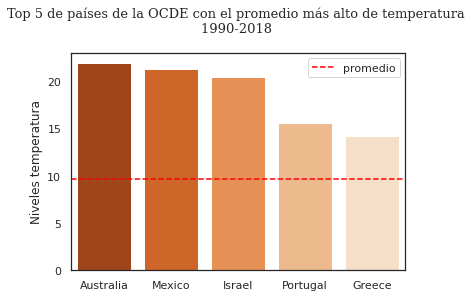

In [149]:
sns.barplot(data = top_country_temp, x = top_country_temp.index, y = 'mean_annual_temp', palette = 'Oranges_r');
plt.axhline( y = df['mean_annual_temp'].mean(), color = 'red', linestyle = '--', label = 'promedio')
plt.xlabel('');
plt.ylabel('Niveles temperatura');
plt.title('Top 5 de países de la OCDE con el promedio más alto de temperatura \n1990-2018 \n', size = 13, family = 'serif');
plt.legend();

In [109]:
# Observemos ahora el número de muertes en el año inicial y en el úlimo año con infomación disponible
df_1990 = df[df['year'] == 1990]
df_2018 = df[df['year'] == 2018]

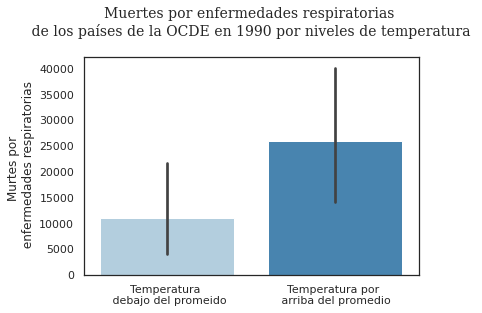

In [192]:
# Graficamos
sns.set_theme(style = 'white');
sns.barplot(data = df_1990, y = "total_respiratory_diseases", x = 'mean_temp_category', palette = 'Blues' );
plt.xticks([0,1], labels = ('Temperatura \n debajo del promeido', 'Temperatura por \n arriba del promedio'));
plt.xlabel('')
plt.ylabel('Murtes por \n enfermedades respiratorias');
plt.title('Muertes por enfermedades respiratorias \n de los países de la OCDE en 1990 por niveles de temperatura \n', size = 14, family = 'serif');

# 4. Correlaciones y regresión lineal simple

Primeramente identificamos que columnas de nuestro dataset son de tipo numérico

In [5]:
df.dtypes[(df.dtypes=='float64') | (df.dtypes=='int64')]

year                                                 int64
respiratory_infections_and_tuberculosis_number       int64
respiratory_infections_and_tuberculosis_percent    float64
respiratory_infections_and_tuberculosis_rate       float64
chronic_respiratory_diseases_number                  int64
chronic_respiratory_diseases_percent               float64
chronic_respiratory_diseases_rate                  float64
all_greenhouse_gas                                 float64
CO2                                                float64
CH4                                                float64
N2O                                                float64
Fgas                                               float64
mean_annual_temp                                   float64
total_respiratory_diseases                           int64
total_diseases_percent                             float64
dtype: object

Corroboramos que las columnas efectivamente sean numéricas y revisamos que no contengan ningún NaN

In [6]:
print(df.dtypes)
df.isna().sum()

country                                             object
year                                                 int64
respiratory_infections_and_tuberculosis_number       int64
respiratory_infections_and_tuberculosis_percent    float64
respiratory_infections_and_tuberculosis_rate       float64
chronic_respiratory_diseases_number                  int64
chronic_respiratory_diseases_percent               float64
chronic_respiratory_diseases_rate                  float64
all_greenhouse_gas                                 float64
CO2                                                float64
CH4                                                float64
N2O                                                float64
Fgas                                               float64
mean_annual_temp                                   float64
total_respiratory_diseases                           int64
total_diseases_percent                             float64
dtype: object


country                                            0
year                                               0
respiratory_infections_and_tuberculosis_number     0
respiratory_infections_and_tuberculosis_percent    0
respiratory_infections_and_tuberculosis_rate       0
chronic_respiratory_diseases_number                0
chronic_respiratory_diseases_percent               0
chronic_respiratory_diseases_rate                  0
all_greenhouse_gas                                 0
CO2                                                0
CH4                                                0
N2O                                                0
Fgas                                               0
mean_annual_temp                                   0
total_respiratory_diseases                         0
total_diseases_percent                             0
dtype: int64

El dataset cuenta con distintas columnas que contienen información de tipo categórica o basada en otras columnas, por lo que se procederá a eliminarlas para evitar correlaciones redundantes

In [7]:
df_simp = df.drop(columns=['country','year','respiratory_infections_and_tuberculosis_percent','respiratory_infections_and_tuberculosis_rate','chronic_respiratory_diseases_percent','chronic_respiratory_diseases_rate','total_respiratory_diseases','total_diseases_percent']) #'all_greenhouse_gas'
df_simp.dtypes

respiratory_infections_and_tuberculosis_number      int64
chronic_respiratory_diseases_number                 int64
all_greenhouse_gas                                float64
CO2                                               float64
CH4                                               float64
N2O                                               float64
Fgas                                              float64
mean_annual_temp                                  float64
dtype: object

In [8]:
#Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
df_simp.corr()

,respiratory_infections_and_tuberculosis_number,chronic_respiratory_diseases_number,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp
respiratory_infections_and_tuberculosis_number,1.000000,0.773621,0.757036,0.796699,0.304623,0.339676,0.842089,0.149408
chronic_respiratory_diseases_number,0.773621,1.000000,0.826944,0.824136,0.568804,0.576748,0.781837,0.225758
all_greenhouse_gas,0.757036,0.826944,1.000000,0.990066,0.730992,0.749569,0.814105,0.121132
CO2,0.796699,0.824136,0.990066,1.000000,0.629457,0.654810,0.826276,0.071815
CH4,0.304623,0.568804,0.730992,0.629457,1.000000,0.946325,0.459647,0.301297
N2O,0.339676,0.576748,0.749569,0.654810,0.946325,1.000000,0.478968,0.288188
Fgas,0.842089,0.781837,0.814105,0.826276,0.459647,0.478968,1.000000,0.177773
mean_annual_temp,0.149408,0.225758,0.121132,0.071815,0.301297,0.288188,0.177773,1.000000


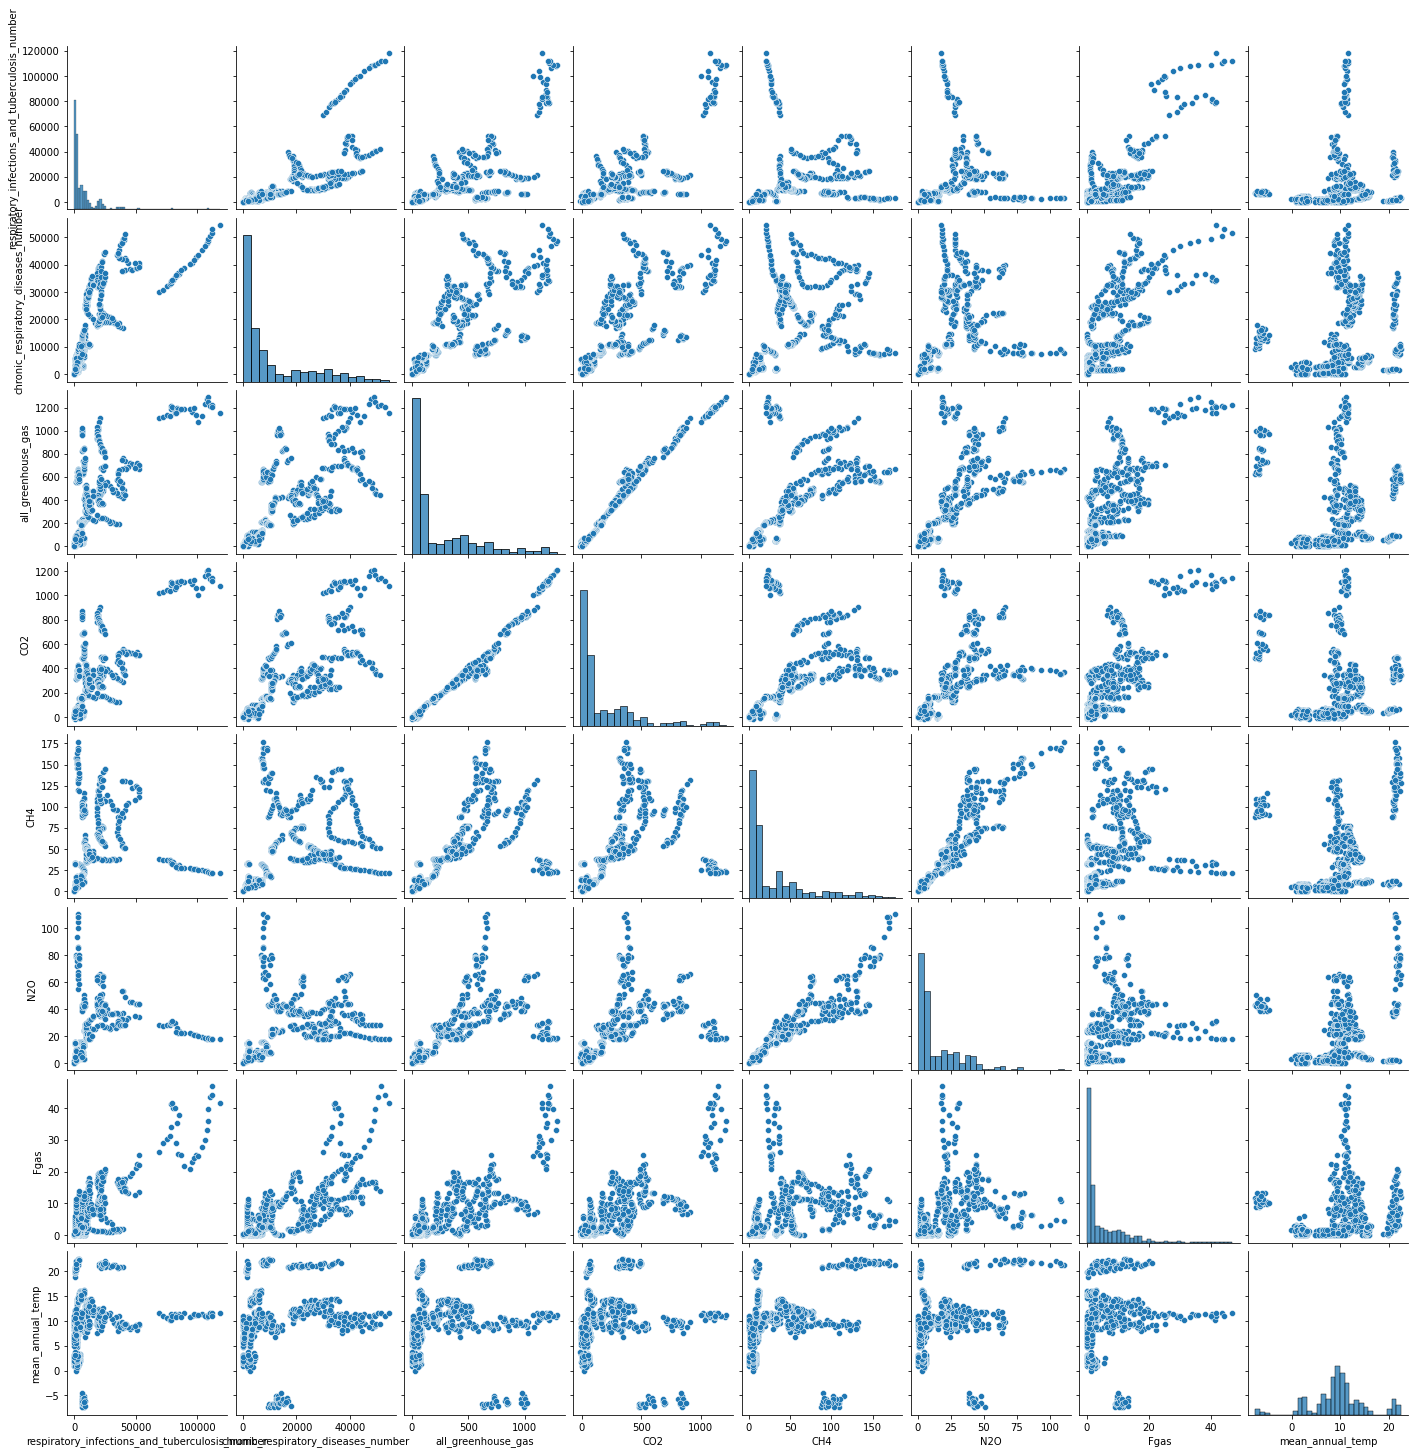

In [9]:
sns.pairplot(df_simp)
#plt.rcParams["figure.figsize"] = (20,20)

<AxesSubplot:>

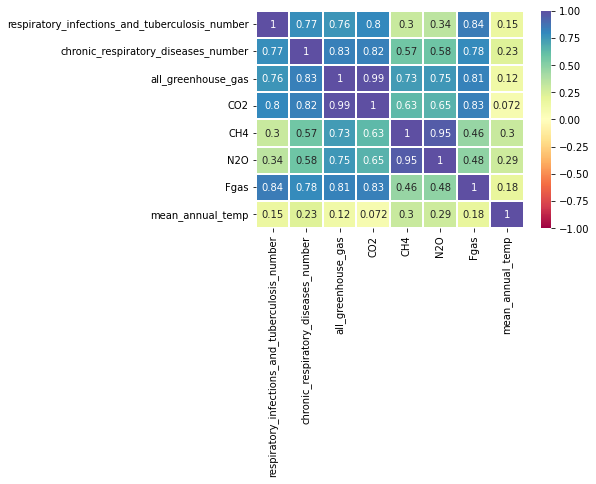

In [10]:
sns.heatmap(df_simp.corr(), vmin=-1, vmax=1, cmap='Spectral',linewidth=2,annot=True)
#plt.rcParams["figure.figsize"] = (8,6)

Se puede observar en la gráfica de calor que no hay presencia de correlaciones negativas y que tanto las infecciones respiratorias y tuberculosis como el número de muertes por enfermedades respiratorias crónicas estan mayormente correlacionadas con las emisiones de dióxido de carbono y los gases de fluoruro.

### Identificación de valores atípicos

In [11]:
df_simp.describe()

,respiratory_infections_and_tuberculosis_number,chronic_respiratory_diseases_number,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,9693.106681,10601.252155,243.078718,190.630916,31.443071,16.072759,4.932263,9.609932
std,17750.419833,12857.808723,305.860433,260.161024,38.572636,18.938883,7.236887,5.671693
min,83.000000,69.000000,-2.870000,-11.810000,0.510000,0.210000,0.000000,-7.450000
25%,1230.000000,1793.000000,41.382500,22.747500,5.872500,3.102500,0.407500,7.029166
50%,2995.500000,4360.000000,74.770000,59.140000,11.750000,6.570000,1.530000,9.650000
75%,9632.000000,16986.500000,398.800000,305.032500,45.102500,24.732500,7.245000,11.785417
max,118141.000000,54301.000000,1289.000000,1211.270000,176.750000,110.290000,46.790000,22.600000


Obteniendo las medidas de locación podemos observar desde la primer columna que la distancia entre el percentil 75 y el valor máximo es muy grande, visualicemos una gráfica de caja por columna para darnos una mejor idea sobre los valores atípicos contenidos en el dataset

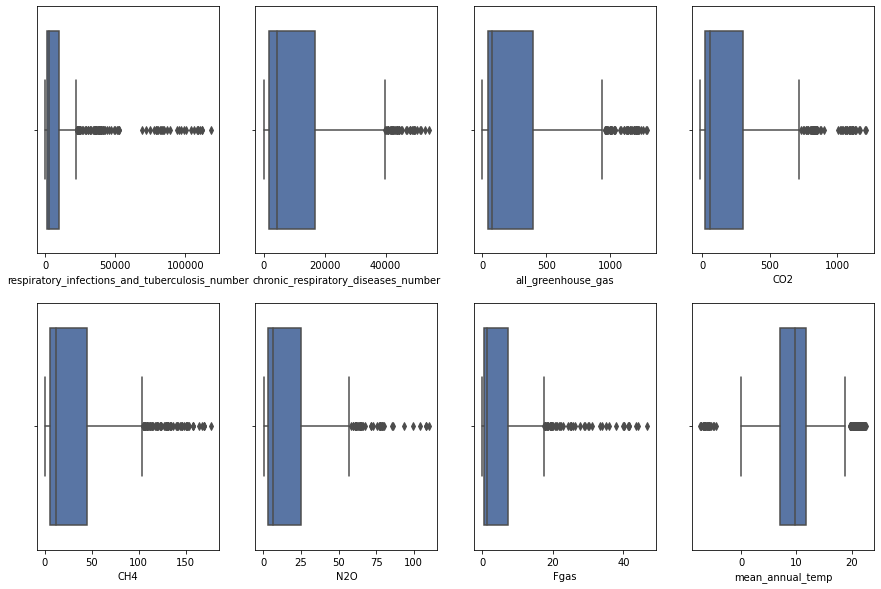

In [14]:
fig, ax1 = plt.subplots(2,4,sharey=True)
plt.rcParams["figure.figsize"] = (15,10)

columnas = list(df_simp.columns.values)
k=0
sns.set(style="darkgrid")
for i in [0,1]:
    for j in [0,1,2,3]:
        sns.boxplot(data=df_simp,x=columnas[k], ax=ax1[i,j])
        k+= 1

Eliminando valores atípicos

In [15]:
dfs = []

for columna in columnas:
    iqr = df_simp[columna].quantile(0.75) - df_simp[columna].quantile(0.25)
    filtro_inferior = df_simp[columna] > df_simp[columna].quantile(0.25) - (iqr * 1.5)
    filtro_superior = df_simp[columna] < df_simp[columna].quantile(0.75) + (iqr * 1.5)
    df_filtrado = df_simp[filtro_inferior & filtro_superior]
    dfs.append(df_filtrado) 

#desempaquetando dfs
df_desc = pd.DataFrame()
for i,columna in enumerate(columnas):
    df_desc[columna] = dfs[i][columna]

df_desc = df_desc.dropna()

In [16]:
df_desc.describe()

,respiratory_infections_and_tuberculosis_number,chronic_respiratory_diseases_number,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,3984.442060,6322.484979,111.262761,84.622546,15.719771,8.581330,2.339399,8.730198
std,4289.599224,8463.088609,134.620984,109.001328,16.893272,9.176648,3.539531,3.782387
min,83.000000,69.000000,-2.870000,-11.810000,0.510000,0.210000,0.000000,-0.025000
25%,836.500000,1249.500000,29.695000,14.595000,4.950000,2.440000,0.270000,6.554167
50%,2259.000000,2900.000000,61.120000,42.540000,8.800000,5.190000,1.050000,9.233333
75%,5665.500000,6739.000000,117.240000,95.525000,17.740000,10.220000,2.475000,10.966666
max,21827.000000,37650.000000,832.310000,717.170000,75.380000,50.160000,17.300000,18.841667


<AxesSubplot:>

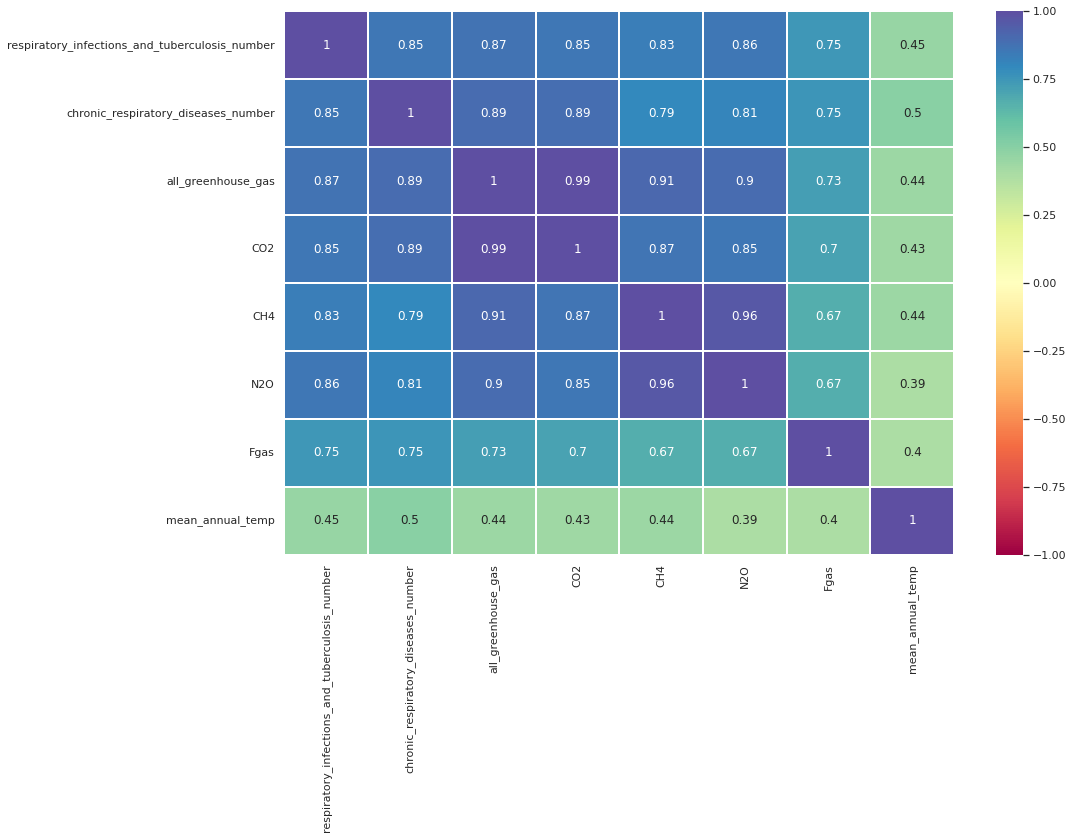

In [17]:
sns.heatmap(df_desc.corr(), vmin=-1, vmax=1, cmap='Spectral',linewidth=2,annot=True)

Comparando este nuevo mapa de calor, se puede apreciar que la correlación de el número de infecciones respiratorias y tuberculosis con N₂O y CH₄ aumentó considerablemente.

### Implementación de modelo

In [23]:
def modelado_lineal(serie_1,serie_2):
    linear_regression = LinearRegression()

    #Fit
    linear_regression.fit(serie_1.to_frame(),serie_2)
    LinearRegression(copy_X=True, fit_intercept=True,n_jobs=None,normalize=False)

    #Predict
    y_predict = linear_regression.predict(serie_1.to_frame())

    print(f'correlación: {serie_1.corr(serie_2)}')

    #Gráfica
    plt.rcParams["figure.figsize"] = (6.4,4.8) #Tamaño default
    sns.scatterplot(x=serie_1,y=serie_2)
    sns.lineplot(x=serie_1, y = y_predict,color='g')
    plt.title('Regresión Lineal')

    # for i in range(len(serie_1)):
        # plt.plot([serie_1[i],serie_1[i]],[serie_2[i],y_predict[i]], 'y--')


correlación: 0.8878412885970897


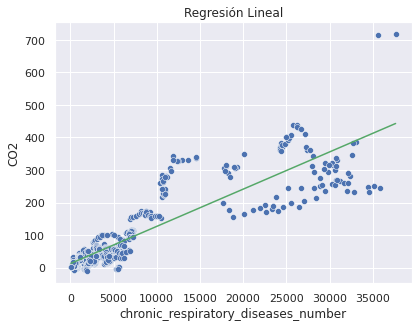

In [24]:
modelado_lineal(df_desc['chronic_respiratory_diseases_number'],df_desc['CO2'])

correlación: 0.8569383350044929


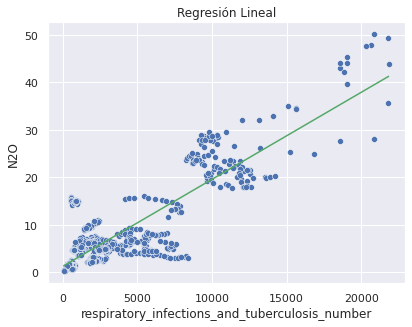

In [25]:
modelado_lineal(df_desc['respiratory_infections_and_tuberculosis_number'],df_desc['N2O'])

En la siguiente gráfica se puede corroborar la alta correlación que existe entre el dióxido de carbono y la suma total de todos los gases de efecto invernadero:

correlación: 0.9949893586196888


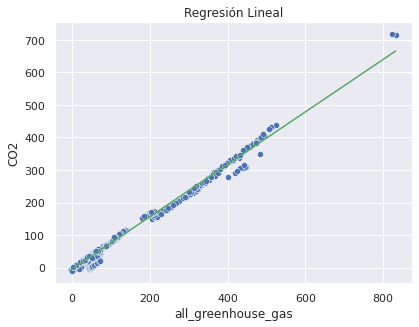

In [26]:
modelado_lineal(df_desc['all_greenhouse_gas'],df_desc['CO2'])
